## To do
1. Convert 'Taxi ID' to something other than object type.

This notebook is a continuation of the chicago-taxi Jupyter notebook. In this, I will attempt to use the full taxi trip dataset by slicing off a small piece.

First, I'll again focus on weekday evening rush, and remake the 'to the Loop', 'from the Loop', and fare plots.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas

## Data cleaning?

In [6]:
#Omit 'Taxi ID' for now, as it uses a lot of memory.
columns = ['Trip Start Timestamp', 'Trip End Timestamp',
           'Pickup Community Area', 'Dropoff Community Area', 'Fare']
#Use time parser
time_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

df_list = []

for chunk in pd.read_csv('Data/Taxi_Trips.csv',
                           iterator=True, chunksize=1000000):
    df = chunk[chunk['Pickup Community Area'] == 32.][columns] #select trips leaving the Loop
    df['hour'] = df['Trip Start Timestamp'].apply(lambda x: time_parser(x).hour) #create hour column
    df_list.append(df[(df.hour >= 16) & (df.hour <= 18)]) #only append evening rush hour trips
    
    #print the number of DataFrames appended so far, and length of the last one appended
    print(len(df_list), len(df_list[-1]))

1 50541
2 47066


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3 7433


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4 57
5 40161
6 61526
7 22186
8 1
9 0
10 3
11 1
12 2
13 3
14 4
15 4
16 3
17 6


KeyboardInterrupt: 

There's something weird happening here. What's causing some chunks to have almost no matches? 3rd chunk is the first one with a problem. Look at it.

In [28]:
#Omit 'Taxi ID' for now, as it uses a lot of memory.
columns = ['Trip Start Timestamp', 'Trip End Timestamp',
           'Pickup Community Area', 'Dropoff Community Area', 'Fare']
#Use time parser
time_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

count = 0
for chunk in pd.read_csv('Data/Taxi_Trips.csv',
                        iterator=True, chunksize=1000000,
                        low_memory=False):
    #df = chunk[chunk['Pickup Community Area'] == 32.][columns] #select trips leaving the Loop
    
    if count == 3:
        df = chunk
        break
    
    print(count, chunk['Pickup Community Area'].memory_usage(), chunk['Pickup Community Area'].iloc[0])
    count += 1

0 8000080 8.0
1 8000084 21.0
2 8000084 28.0


It appears that many rows at certain spots in data have nan as the community area (and other) values.

In [38]:
np.isnan(df['Pickup Census Tract'].iloc[0])

True

In [40]:
#Omit 'Taxi ID' for now, as it uses a lot of memory.
columns = ['Trip Start Timestamp', 'Trip End Timestamp',
           'Pickup Community Area', 'Dropoff Community Area', 'Fare']
#Use time parser
time_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

df_list = []

for chunk in pd.read_csv('Data/Taxi_Trips.csv',
                        iterator=True, chunksize=1000000,
                        low_memory=False):
    
    df = chunk[chunk['Pickup Community Area'] == 32.][columns] #select trips leaving the Loop
    
    df['hour'] = df['Trip Start Timestamp'].apply(lambda x: time_parser(x).hour) #create hour column
    df_list.append(df[(df.hour >= 16) & (df.hour <= 18)]) #only append evening rush hour trips
    
    #print the number of DataFrames appended so far, and length of the last one appended
    print(len(df_list), len(df_list[-1]))

1 50541
2 47066
3 7433
4 57
5 40161
6 61526
7 22186
8 1
9 0
10 3
11 1
12 2
13 3
14 4
15 4
16 3
17 6
18 3
19 4
20 2
21 46463
22 50608
23 50783
24 50713
25 50729
26 50846
27 50843
28 50593
29 50273
30 50609
31 50533
32 50759
33 50242
34 51097
35 51317
36 50904
37 50911
38 50984
39 50746
40 50856
41 50760
42 50625
43 50871
44 50725
45 50438
46 50723
47 50872
48 50749
49 50411
50 50499
51 50757
52 50302
53 50586
54 50151
55 50691
56 50314
57 50735
58 50617
59 51180
60 50856
61 50687
62 50603
63 50511
64 50720
65 50796
66 50596
67 50448
68 50786
69 50705
70 50737
71 50844
72 50538
73 50589
74 50332
75 50911
76 50802
77 50912
78 50692
79 50720
80 50563
81 50893
82 50598
83 50847
84 50745
85 51057
86 50852
87 50689
88 50610
89 50840
90 50591
91 50878
92 50772
93 50626
94 50828
95 51264
96 50837
97 50893
98 50651
99 50376
100 50576
101 50779
102 50606
103 51197
104 50454
105 50516
106 50377
107 50205
108 50412
109 50752
110 50957
111 50731
112 50828
113 43886


In [59]:
df = pd.concat(df_list)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4933292 entries, 3 to 112860028
Data columns (total 6 columns):
Trip Start Timestamp      object
Trip End Timestamp        object
Pickup Community Area     float64
Dropoff Community Area    float64
Fare                      object
hour                      int64
dtypes: float64(2), int64(1), object(3)
memory usage: 263.5+ MB


In [60]:
df.memory_usage(deep=True)

Index                      39466336
Trip Start Timestamp      389730068
Trip End Timestamp        389695241
Pickup Community Area      39466336
Dropoff Community Area     39466336
Fare                      307069362
hour                       39466336
dtype: int64

In [64]:
def fare_converter(fare):
    """Keep nan's as is, but turn string '$_.__' into float _.__"""
    try: return float(fare[1:])
    except TypeError: return fare

#convert Fare to float
df['Fare'] = df['Fare'].apply(fare_converter)
#parse timestamps
df['Trip Start Timestamp'] = df['Trip Start Timestamp'].apply(time_parser)

TypeError: strptime() argument 1 must be str, not Timestamp

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4933292 entries, 3 to 112860028
Data columns (total 6 columns):
Trip Start Timestamp      datetime64[ns]
Trip End Timestamp        object
Pickup Community Area     float64
Dropoff Community Area    float64
Fare                      float64
hour                      int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 263.5+ MB


In [66]:
df.memory_usage(deep=True)

Index                      39466336
Trip Start Timestamp       39466336
Trip End Timestamp        389695241
Pickup Community Area      39466336
Dropoff Community Area     39466336
Fare                       39466336
hour                       39466336
dtype: int64

In [72]:
from_Loop = df.groupby('Dropoff Community Area').count()['Trip Start Timestamp']

In [80]:
#top 10
from_Loop.sort_values(ascending=False).head(10)

Dropoff Community Area
8.0     1769137
32.0    1074360
28.0     848461
7.0      210698
33.0     172997
76.0     172764
6.0      155506
24.0     150630
56.0      59875
22.0      35206
Name: Trip Start Timestamp, dtype: int64

In [75]:
#make maps
chi_map = geopandas.read_file('Data/Boundaries - Community Areas (current).geojson')
#Make area_num_1 int and thne the index, as that's all I use to id them
chi_map['area_num_1'] = chi_map['area_num_1'].astype(int)
chi_map = chi_map.set_index(chi_map.area_num_1)

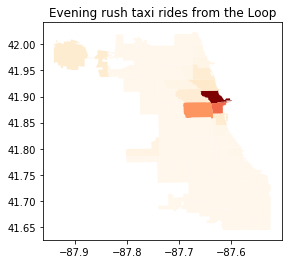

In [76]:
chi_map['From_Loop'] = from_Loop

chi_map.plot(column='From_Loop', cmap='OrRd')
plt.title('Evening rush taxi rides from the Loop')
#plt.savefig('Figs/')
plt.show()

## Fare

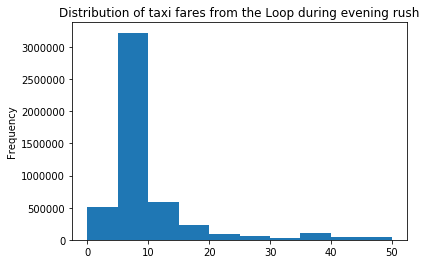

In [82]:
df['Fare'][df.Fare <= 50].plot.hist() #There are some outliers with very high fares
plt.title('Distribution of taxi fares from the Loop during evening rush')
#plt.savefig('Figs/')
plt.show()

In [87]:
#Omit 'Taxi ID' for now, as it uses a lot of memory.
columns = ['Trip Start Timestamp', 'Trip End Timestamp',
           'Pickup Community Area', 'Dropoff Community Area', 'Fare']
#Use time parser
time_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

df_list = []

for chunk in pd.read_csv('Data/Taxi_Trips.csv',
                        iterator=True, chunksize=10,
                        low_memory=False):
    print(chunk['Trip Start Timestamp'])
    break

0    01/12/2016 11:00:00 AM
1    09/01/2016 07:30:00 PM
2    01/21/2017 08:30:00 AM
3    05/05/2017 04:15:00 PM
4    09/23/2015 05:15:00 PM
5    04/05/2017 11:15:00 AM
6    08/22/2015 04:30:00 PM
7    04/10/2014 02:45:00 PM
8    05/26/2014 02:45:00 AM
9    03/28/2015 11:45:00 AM
Name: Trip Start Timestamp, dtype: object


In [83]:
df.dtypes

Trip Start Timestamp      datetime64[ns]
Trip End Timestamp                object
Pickup Community Area            float64
Dropoff Community Area           float64
Fare                             float64
hour                               int64
dtype: object